<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [41]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

Так же загрузим файл с тест данными и назовём его test_data

In [43]:
data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
data.sample(5) # выгрузить случайные 5 строк из train data сета

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
3402,3,19.30,54.7,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
4922,28,20.25,535.35,Female,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,0
767,27,85.90,2220.1,Male,1,Yes,No,Yes,Yes,Fiber optic,Yes,No,Yes,No,No,No,One year,Yes,Electronic check,0
699,72,89.70,6588.95,Male,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,One year,Yes,Electronic check,0
3068,69,20.20,1412.65,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),0


In [44]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

В данных нет пропущенных значений,для каждого признака есть 5282 значения - это число всех объектов. 
TotalSpent - числовой признак, но тип данных у него - строка(str), его нужно перевести в числовой вид. В категориальных признаках есть бинарный признак IsSeniorCitizen,он в числовом виде (0,1). Если найдутся и другие бинарные признаки, то их также можно перевести в вид (0,1) для удобства работы логистической регрессии.

In [46]:
data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
test_data.TotalSpent = pd.to_numeric(data.TotalSpent, errors='coerce')
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Появились Nan в TotalSpent. Необходимо от них избавиться

In [47]:
data.TotalSpent.fillna(data.TotalSpent.median(), inplace=True)
test_data.TotalSpent.fillna(test_data.TotalSpent.median(), inplace=True)
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [48]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

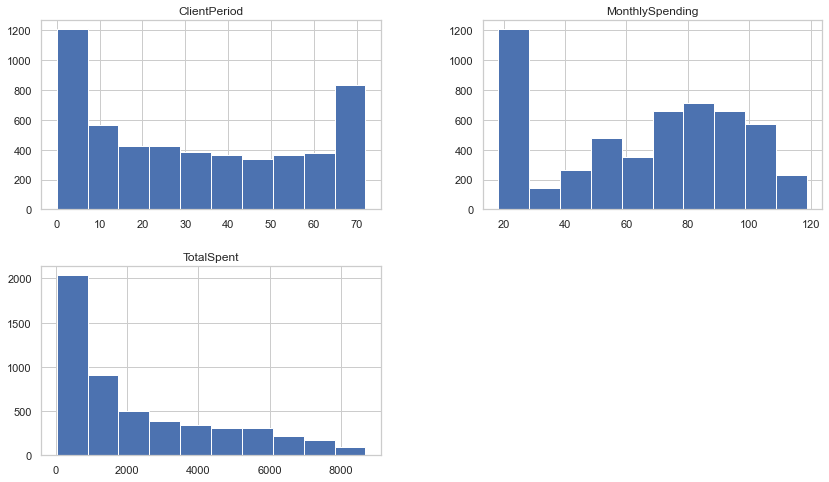

In [49]:
data.hist(column=num_cols, figsize=(14, 8))
print()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

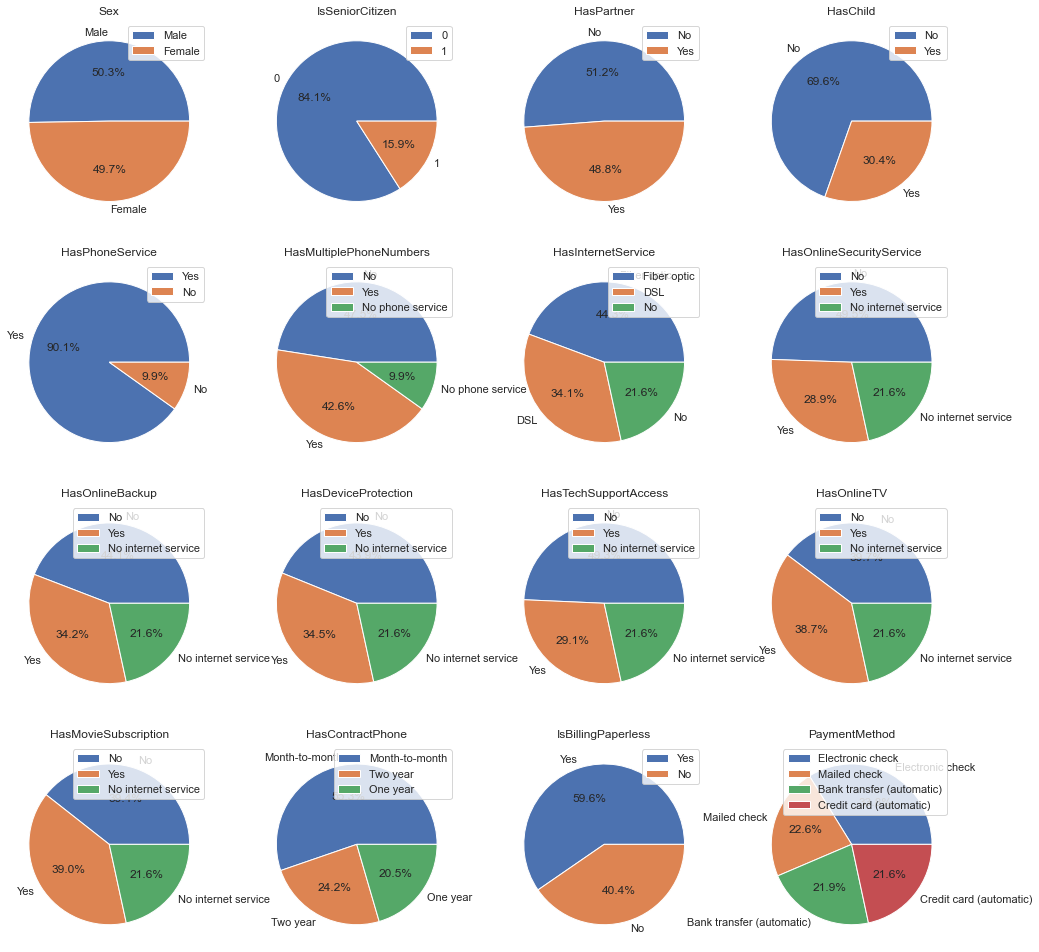

In [50]:
fig = plt.figure(figsize=(17,17))
for i in range(len(cat_cols)):
    data_i = data[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i+1)
    plt.pie(data_i, labels = data_i.index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
    plt.legend()

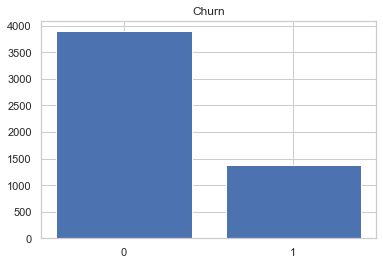

Churn
0    3898
1    1384
dtype: int64

In [51]:
plt.bar(data[target_col].value_counts().index, data[target_col].value_counts().values)
plt.xticks(data[target_col].value_counts().index)
plt.title('Churn')
plt.show()

data.value_counts(data['Churn'])

Посмотрим на данные в тест выборке:

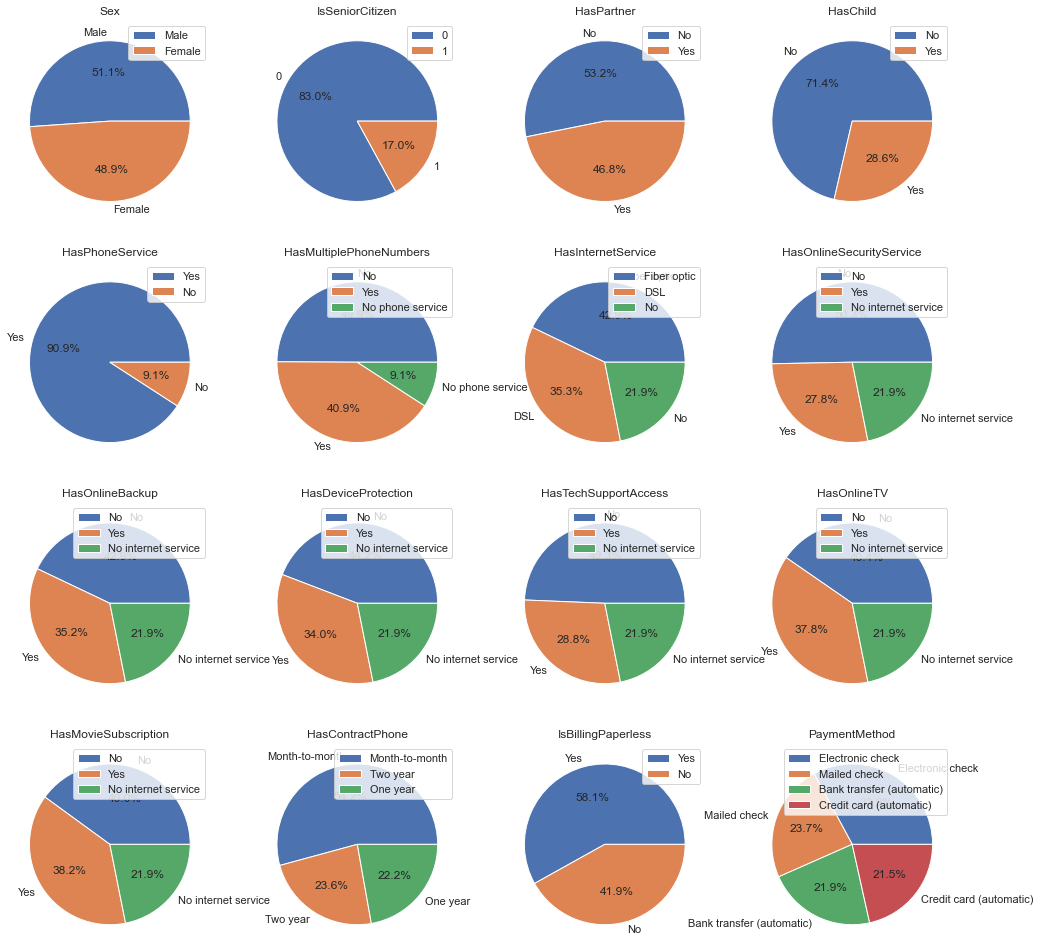

In [52]:
fig = plt.figure(figsize=(17,17))
for i in range(len(cat_cols)):
    test_i = test_data[cat_cols[i]].value_counts()
    plt.subplot(4, 4, i+1)
    plt.pie(test_i, labels = test_i.index, autopct='%1.1f%%')
    plt.title(cat_cols[i])
    plt.legend()

Данные на train и test очень похожи. Отлично.

Теперь необходимо посмотреть на распределение категориальных признаков относительно таргета.

16


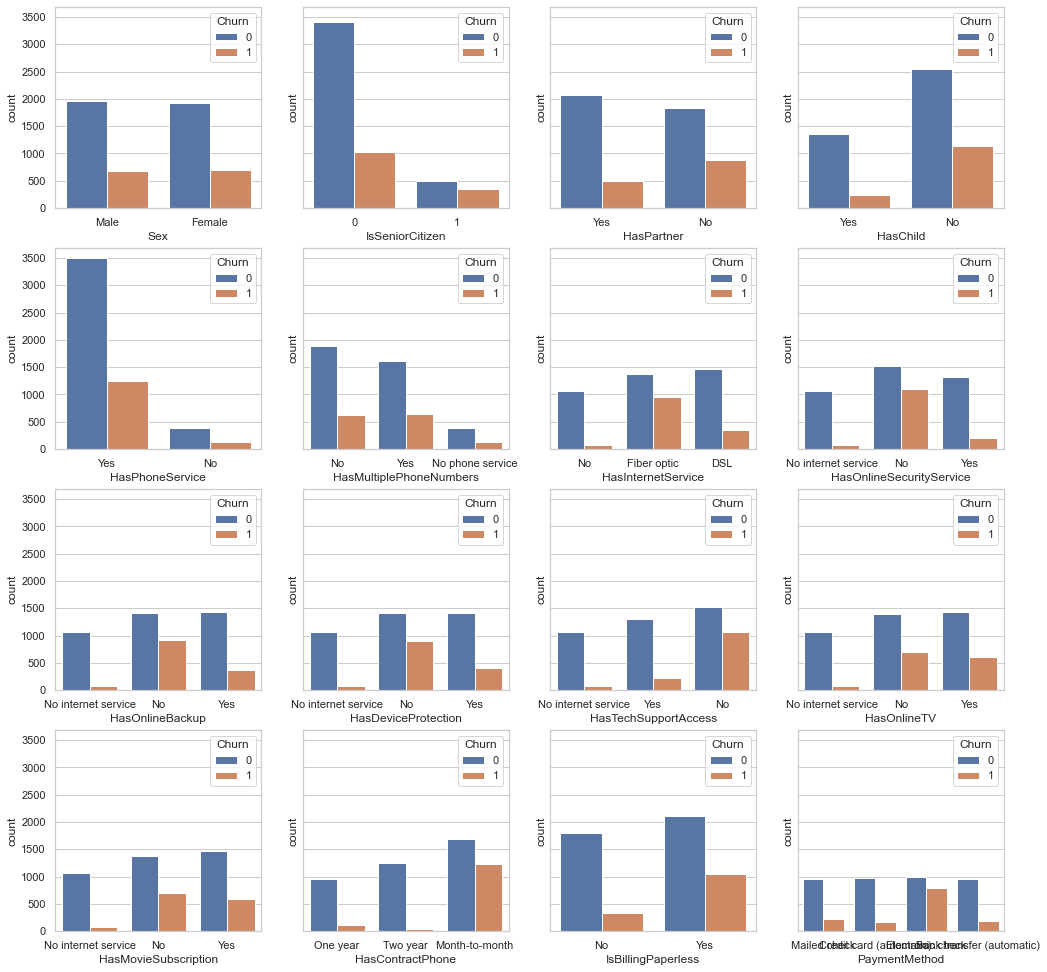

In [53]:
import seaborn as sns

sns.set_theme(style="whitegrid")
categor = len(cat_cols)
print(categor)
fig, axes = plt.subplots(4, 4, figsize=(17, 17), sharey=True)
for i in range(len(cat_cols)):
    sns.countplot(x=cat_cols[i], data=data, ax=axes[i//4, i%4],hue = target_col)

Можем заметить что распределение хорошее, но 4 признака : IsSeniorCitizen, HasChild, HasPhoneService, HasMultiplePhoneNumber. Возможна ошибка при разделении данных. Так как модель не будет знать о разных значениях призаков.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [54]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Делаем one-hot-encoding для категориальных признаков и так же сохраняем неизмененный train dataset

In [55]:
dummy_features = pd.get_dummies(data[cat_cols])
X_origin = data[feature_cols]
dummy_features.shape

(5282, 42)

In [56]:
stan_scaler = StandardScaler()
lr_cv = LogisticRegressionCV(scoring='roc_auc')

Используем StandardScaler для уменьшения влияния больших чисел

In [57]:
data_scaler_num_cols = stan_scaler.fit_transform(data[num_cols])
X = pd.DataFrame(data_scaler_num_cols, columns=num_cols).join(dummy_features)
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920767,-1.505447,-0.557323,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.613288,-1.294998,-0.184235,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.279005,0.363737,-0.976549,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.016173,0.476418,0.123552,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.124450,1.667856,1.970998,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


In [58]:
y = data['Churn']
X.shape, X_origin.shape, y.shape

((5282, 45), (5282, 19), (5282,))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((4225, 45), (4225,))

Попробуем для начала GridSearchCV

In [60]:
grid_cv = GridSearchCV(lr_cv, param_grid={
                                    'penalty': ['l1', 'l2'],
                                    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga']
                                    },
                      scoring='roc_auc',
                      refit=True,
                      n_jobs=-1,
                      verbose=0)
grid_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.8480201         nan 0.84798382 0.84865944
 0.84865944 0.84862033 0.84865509 0.84845641]
  warnings.warn(


GridSearchCV(estimator=LogisticRegressionCV(scoring='roc_auc'), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='roc_auc')

Выпишем лучшее качество и с какими параметрами получилось получить.

In [61]:
print(f'Лучшее качество на train: {grid_cv.score(X_train, y_train)} \nЛучшее качество на тесте: {grid_cv.score(X_test, y_test)}')
print(f'Параметры: {grid_cv.best_params_}')

Лучшее качество на train: 0.8537121834500904 
Лучшее качество на тесте: 0.8270195140421681
Параметры: {'penalty': 'l2', 'solver': 'lbfgs'}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [62]:
import catboost
from catboost import CatBoostClassifier

In [63]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2,
                                                    random_state=42)

In [64]:
cat_class = CatBoostClassifier(cat_features=cat_cols, random_seed=42, verbose=False)

In [65]:
cat_class.fit(X_train, y_train, use_best_model=True, eval_set=(X_test, y_test))

In [66]:
roc_auc_score(y_train, cat_class.predict_proba(X_train)[:, 1])

0.873011444178972

In [67]:
roc_auc_score(y_test, cat_class.predict_proba(X_test)[:, 1])

0.8284902245084549

In [68]:
cat_class = catboost.CatBoostClassifier(n_estimators=100, 
                                             cat_features=cat_cols)

cat_class.fit(X_train, y_train)

y_train_predicted = cat_class.predict_proba(X_train)[:, 1]
y_test_predicted = cat_class.predict_proba(X_test)[:, 1]

Learning rate set to 0.157457
0:	learn: 0.6374127	total: 2.12ms	remaining: 210ms
1:	learn: 0.5944644	total: 4.4ms	remaining: 216ms
2:	learn: 0.5607167	total: 6.71ms	remaining: 217ms
3:	learn: 0.5349961	total: 9.29ms	remaining: 223ms
4:	learn: 0.5155555	total: 11.8ms	remaining: 223ms
5:	learn: 0.4993339	total: 14.1ms	remaining: 221ms
6:	learn: 0.4849506	total: 16.1ms	remaining: 214ms
7:	learn: 0.4716881	total: 18.4ms	remaining: 211ms
8:	learn: 0.4603805	total: 20.2ms	remaining: 205ms
9:	learn: 0.4513992	total: 22ms	remaining: 198ms
10:	learn: 0.4441001	total: 23.6ms	remaining: 191ms
11:	learn: 0.4380334	total: 25.3ms	remaining: 186ms
12:	learn: 0.4324179	total: 27ms	remaining: 180ms
13:	learn: 0.4274501	total: 28.4ms	remaining: 174ms
14:	learn: 0.4224788	total: 29.9ms	remaining: 170ms
15:	learn: 0.4192212	total: 31.5ms	remaining: 165ms
16:	learn: 0.4157905	total: 33.2ms	remaining: 162ms
17:	learn: 0.4128357	total: 34.8ms	remaining: 159ms
18:	learn: 0.4100133	total: 36.3ms	remaining: 155

Выпишем лучшее качество и с какими параметрами получилось получить.

In [69]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(f'Лучшее качество на train: {train_auc} \nЛучшее качество на тесте: {test_auc}')

Лучшее качество на train: 0.872562408431784 
Лучшее качество на тесте: 0.8262275930218598


Попробуем иной путь. 

In [70]:
cat_class_1 = CatBoostClassifier(logging_level='Silent')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2, random_state=1)

In [87]:
cat_class_1.fit(X_train, y_train, cat_features=cat_cols)

In [88]:
roc_auc_score(y_test, cat_class_1.predict_proba(X_test)[:, 1])

0.8547039694998878

Попробуем изменить параметры применив Grid

In [89]:
parameters = {
    'iterations':[100, 300, 500, 700, 1000], 
    'depth':[3, 5, 6, 7, 10], 
}

grid_search_cv = GridSearchCV(cat_class_1, param_grid=parameters, n_jobs=-1)
grid_search_cv.fit(X_train, y_train, cat_features=cat_cols)

GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x7f8ed0d54fd0>,
             n_jobs=-1,
             param_grid={'depth': [3, 5, 6, 7, 10],
                         'iterations': [100, 300, 500, 700, 1000]})

In [104]:
y_train_pred = cat_class_1.predict_proba(X_train)[:, 1]
y_test_pred = cat_class_1.predict_proba(X_test)[:, 1]

Можем наблюдать, что качество не изменилось. Grid не помог

In [105]:
print(f'Лучшее качество на train: {roc_auc_score(y_train, y_train_pred)} \nЛучшее качество на тесте: {roc_auc_score(y_test, y_test_pred)}')
print(f'Параметры: {grid_search_cv.best_params_}')

Лучшее качество на train: 0.8897015424085761 
Лучшее качество на тесте: 0.8547039694998878
Параметры: {'depth': 3, 'iterations': 500}


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [153]:
best_model = CatBoostClassifier(iterations=500, depth=3, logging_level='Silent')

In [154]:
best_model.fit(X_train, y_train, cat_features=cat_cols)

In [155]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

In [156]:
y_test_pred = best_model.predict_proba(X_test)[:, 1]
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.